In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# EDA

#### Nessa etapa faremos diversas análises, dentre elas, podemos citar:
- Análise Completa dos dados categóricos, como sexo, faixa etária, raça, estado de origem, etc
- Análise de hitograma da notas por disciplina, 
- Comparação dos boxplots de notas 
- Comparação de notas por disciplina se é treineiro ou não
- Média Geral das notas se é treineiro ou não
- Média geral das notas por tipo de escola (pública e privada)
- Média geral das notas por renda familiar
- Média geral das notas por computadores em casa (pública e privada)
- Média geral das notas por sexo 
- Comparação das notas por sexo em cada disciplina
- Análise da distriuição de renda dos candidatos
- Comparação das notas por renda em cada disciplina
- Segmentação de renda em "baixa, "média" e "alta" e comparação das notas por discplina nessas três categorias
- Analise das correlações entre as features numéricas

In [3]:
df_train_cat = pd.read_parquet("df_train_cat.parquet")
df_train_cat

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,...,maquina_lavar_roupa,maquina_secar_roupa,microondas,maquina_lavar_louca,televisao,celular,computador,internet,estrato,MEDIA_GERAL
2964634,18,F,Solteiro(a),Branco(a),"Cursando Ensino Médio, conclusão em 2023",Não informado,Privada,Ensino Regular,Não,RS,...,"Sim, uma",Não,"Sim, um",Não,"Sim, uma","Sim, três","Sim, um",Sim,"F_De R$ 3.960,01 até R$ 5.280,00_RS",556.90
492858,18,F,Solteiro(a),Pardo(a),Ensino Médio Concluído,2022,Não Respondeu,None,Não,NaN,...,Não,Não,Não,Não,"Sim, uma","Sim, três",Não,Sim,"F_Até R$ 1.320,00_nan",592.42
534610,21,M,Solteiro(a),Indigena,"Cursando Ensino Médio, conclusão em 2023",Não informado,Pública,Ensino Regular,Não,CE,...,Não,Não,"Sim, um",Não,"Sim, uma","Sim, três",Não,Sim,"M_Até R$ 1.320,00_CE",523.34
2426736,18,F,Solteiro(a),Não declarado,"Cursando Ensino Médio, conclusão em 2023",Não informado,Pública,Ensino Regular,Não,CE,...,Não,Não,Não,Não,"Sim, uma","Sim, um",Não,Sim,"F_Até R$ 1.320,00_CE",408.40
1568600,20,F,Solteiro(a),Pardo(a),Ensino Médio Concluído,2020,Não Respondeu,None,Não,NaN,...,Não,Não,Não,Não,"Sim, uma","Sim, três","Sim, um",Sim,"F_De R$ 1.980,01 até R$ 2.640,00_nan",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414978,18,F,Solteiro(a),Branco(a),"Cursando Ensino Médio, conclusão em 2023",Não informado,Privada,Ensino Regular,Não,RJ,...,"Sim, uma","Sim, uma","Sim, um",Não,"Sim, quatro ou mais","Sim, quatro ou mais","Sim, quatro ou mais",Sim,"F_De R$ 15.840,01 até R$ 19.800,00_RJ",690.64
1568228,22,F,Solteiro(a),Pardo(a),Ensino Médio Concluído,2021,Não Respondeu,None,Não,NaN,...,Não,Não,Não,Não,"Sim, uma","Sim, dois",Não,Sim,"F_Até R$ 1.320,00_nan",467.34
361790,17,F,Solteiro(a),Branco(a),"Cursando Ensino Médio, conclusão após 2023",Não informado,Não Respondeu,None,Sim,NaN,...,"Sim, uma","Sim, uma","Sim, dois",Não,"Sim, quatro ou mais","Sim, quatro ou mais","Sim, dois",Sim,"F_De R$ 19.800,01 até R$ 26.400,00_nan",371.76
536226,21,M,Solteiro(a),Branco(a),Ensino Médio Concluído,2019,Não Respondeu,None,Não,NaN,...,"Sim, uma",Não,"Sim, um",Não,"Sim, uma","Sim, quatro ou mais","Sim, um",Sim,"M_De R$ 1.980,01 até R$ 2.640,00_nan",492.64


In [4]:
df_train_num = pd.read_parquet("df_train_num.parquet")
df_train_num

,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,SG_UF_ESC,...,maquina_lavar_roupa,maquina_secar_roupa,microondas,maquina_lavar_louca,televisao,celular,computador,internet,estrato,MEDIA_GERAL
1311244,3,F,1,3,2,0,3,1.0,0,NaN,...,1.0,1.0,1.0,0.0,3.0,4.0,2.0,1.0,F_6.0_nan,589.94
734845,11,F,1,3,1,8,1,NaN,0,NaN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,F_1.0_nan,NaN
2101402,17,F,0,3,1,0,1,NaN,0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,F_0.0_nan,468.96
3383321,13,F,1,1,1,0,1,NaN,0,NaN,...,1.0,0.0,1.0,0.0,1.0,2.0,1.0,1.0,F_2.0_nan,NaN
2026348,3,F,1,3,2,0,2,1.0,0,PI,...,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,F_0.0_PI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3842261,11,F,0,3,1,10,1,NaN,0,NaN,...,1.0,0.0,0.0,0.0,2.0,3.0,2.0,1.0,F_2.0_nan,536.88
906312,2,F,1,1,3,0,1,NaN,1,NaN,...,0.0,0.0,1.0,0.0,1.0,4.0,1.0,1.0,F_3.0_nan,NaN
1501477,5,F,1,3,2,0,2,1.0,0,CE,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,F_2.0_CE,368.56
6570,2,F,1,3,2,0,2,1.0,0,RN,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,F_1.0_RN,427.24


In [5]:
df_train_cat.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'escolaridade_pai', 'escolaridade_mae',
       'ocupacao_pai', 'ocupacao_mae', 'qtd_pessoas_residencia',
       'renda_familiar', 'empregado_domestico', 'banheiro', 'qtd_quartos',
       'carro', 'motocicleta', 'geladeira', 'freezer', 'maquina_lavar_roupa',
       'maquina_secar_roupa', 'microondas', 'maquina_lavar_louca', 'televisao',
       'celular', 'computador', 'internet', 'estrato', 'MEDIA_GERAL'],
      dtype='object')

#### Vamos analisar através de gráficos de barras as diversas features categóricas

#### Para não precisar fazer manualmente cada gráfico, vamos colocar em uma lista as variáveis que queremos analisar e fazer um loop para plotar gráficos de barra dessas categorias

In [6]:
colunas_baplot = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'escolaridade_pai', 'escolaridade_mae',
       'ocupacao_pai', 'ocupacao_mae', 'qtd_pessoas_residencia',
       'renda_familiar', 'empregado_domestico', 'banheiro', 'qtd_quartos',
       'carro', 'motocicleta', 'geladeira', 'freezer', 'maquina_lavar_roupa',
       'maquina_secar_roupa', 'microondas', 'maquina_lavar_louca', 'televisao',
       'celular', 'computador', 'internet']

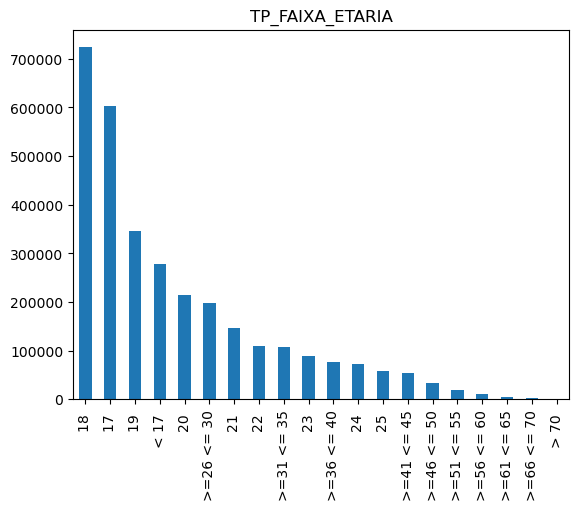

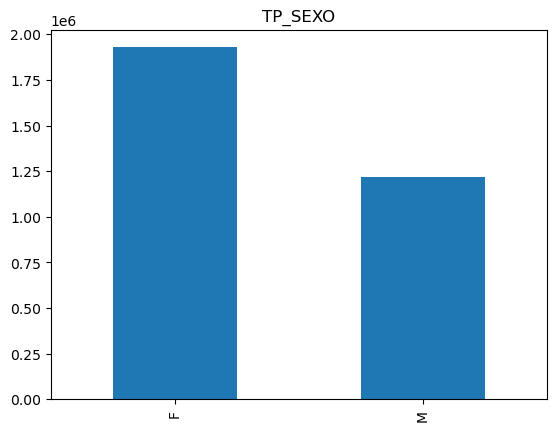

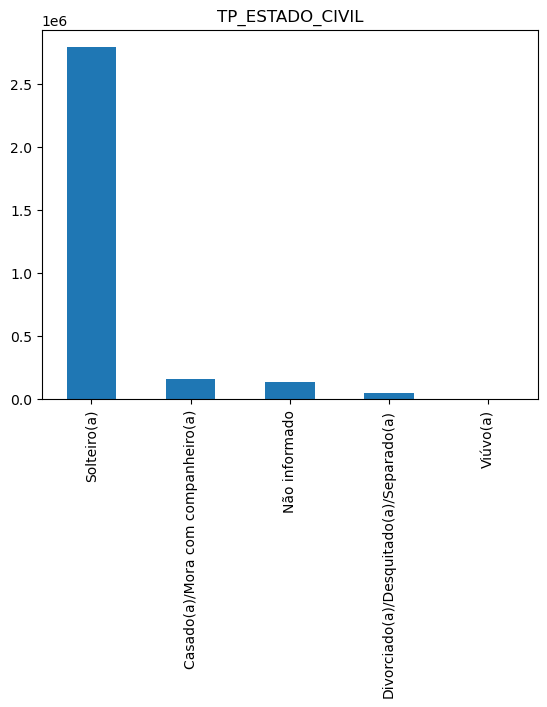

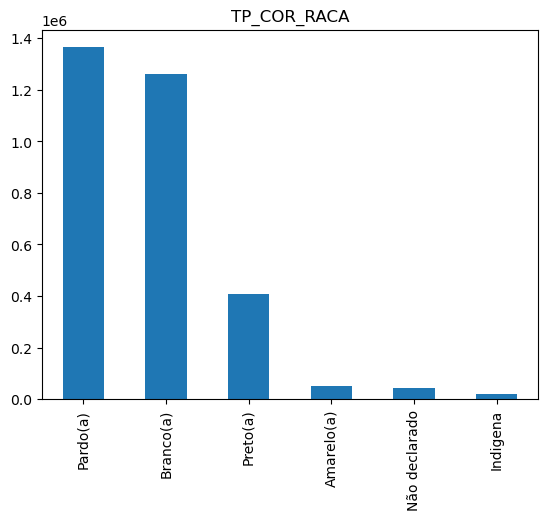

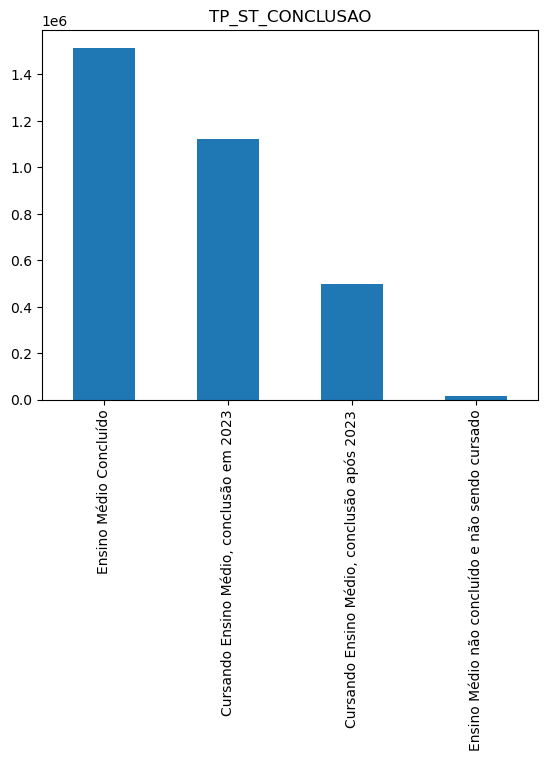

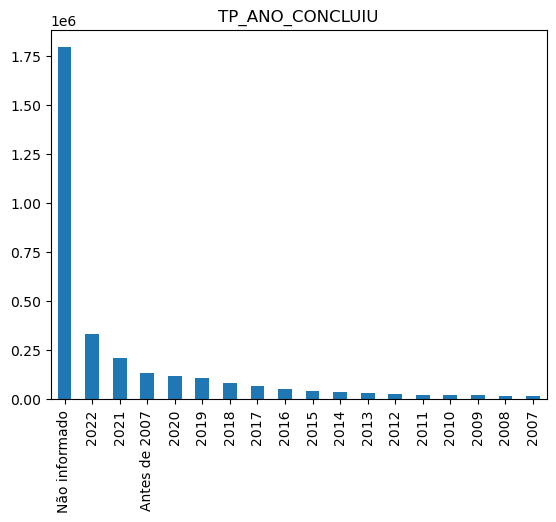

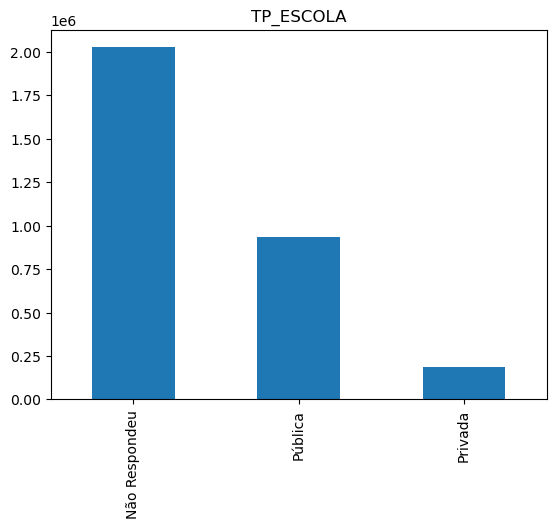

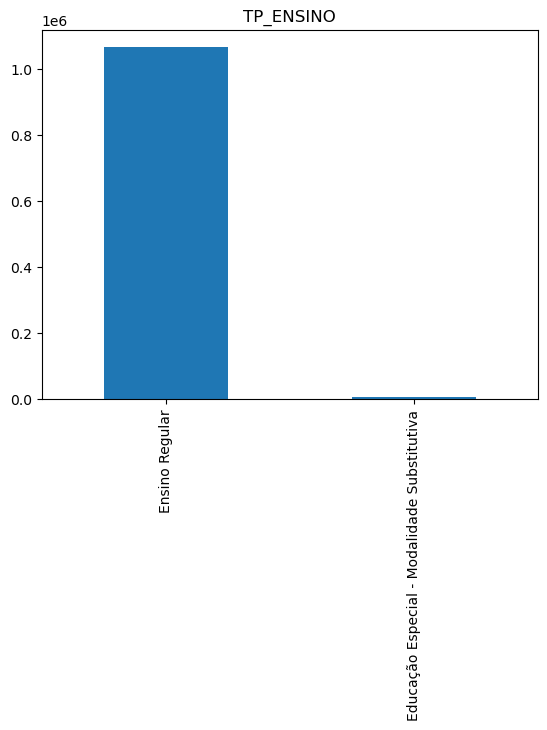

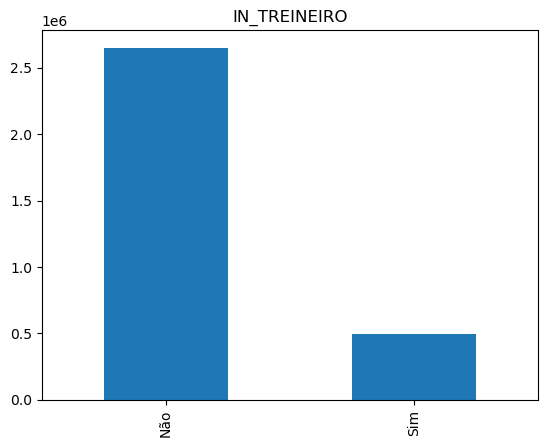

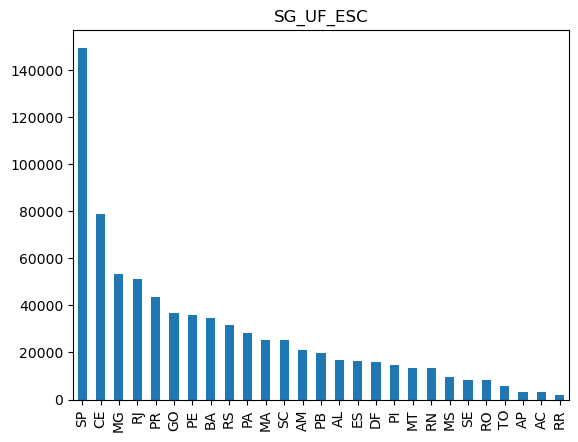

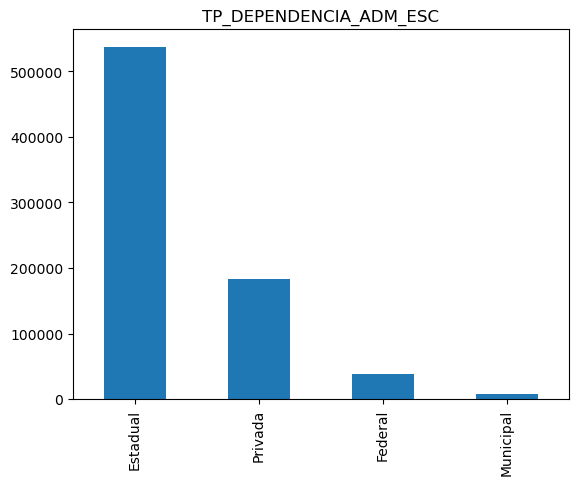

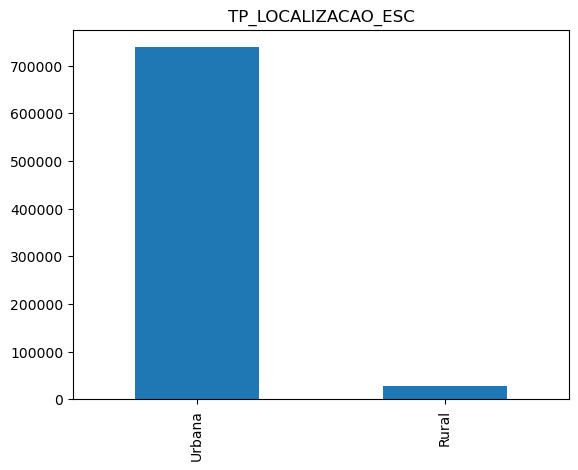

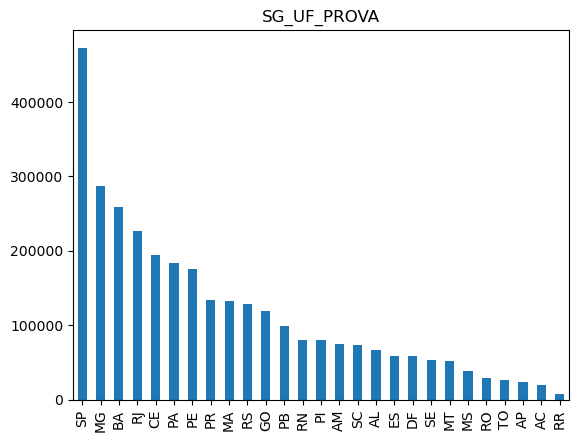

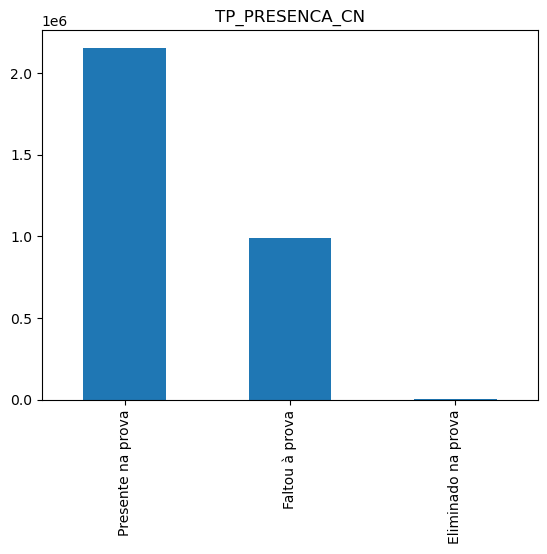

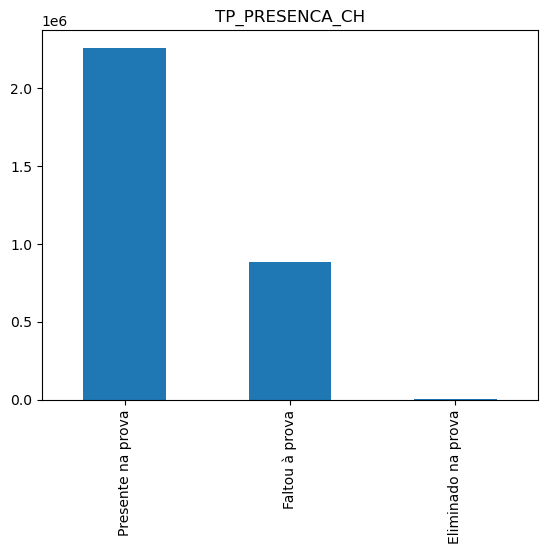

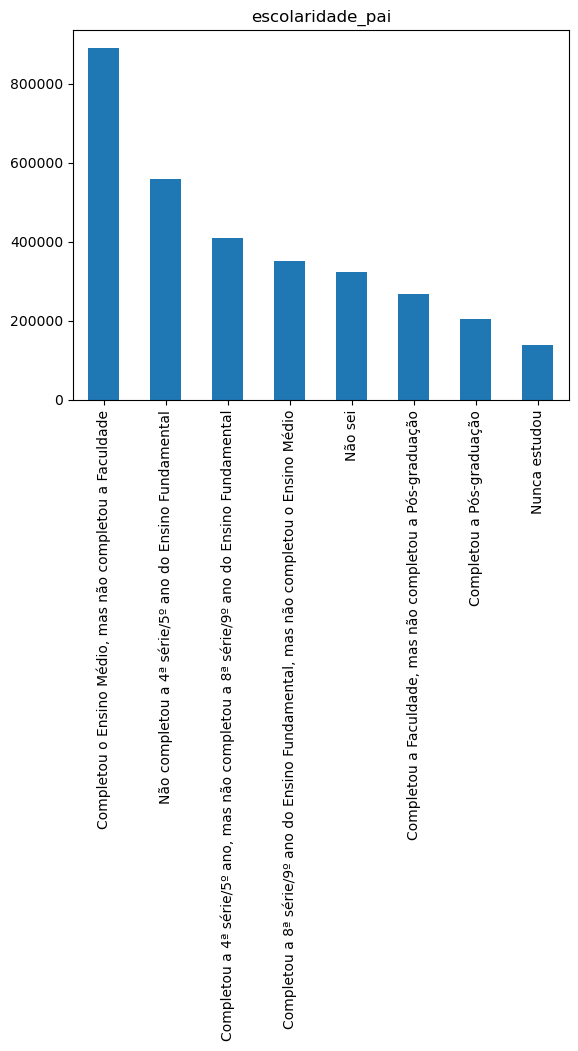

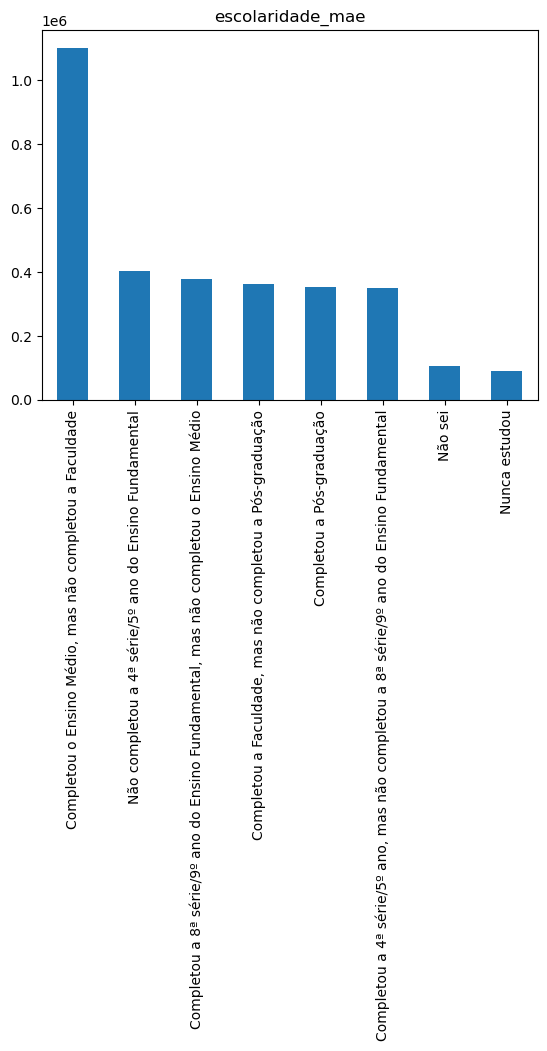

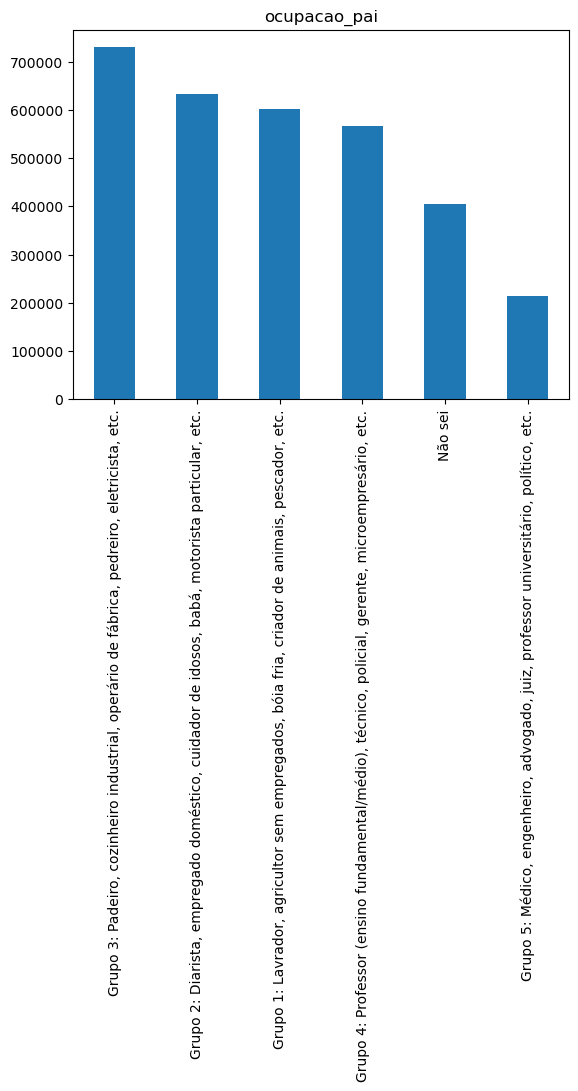

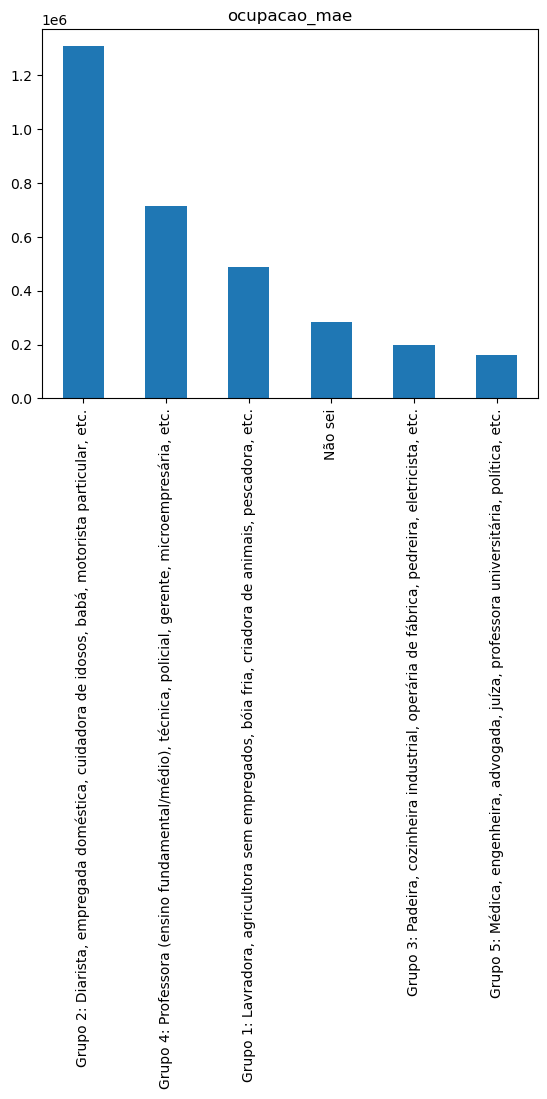

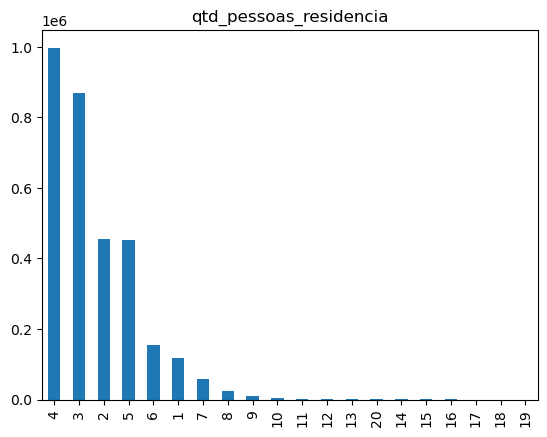

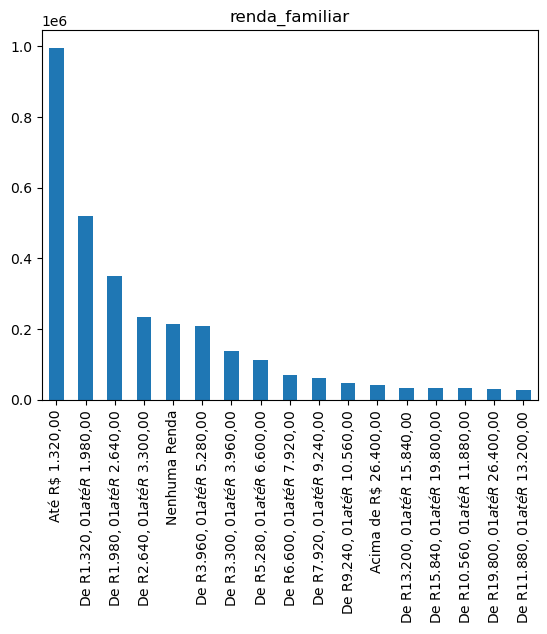

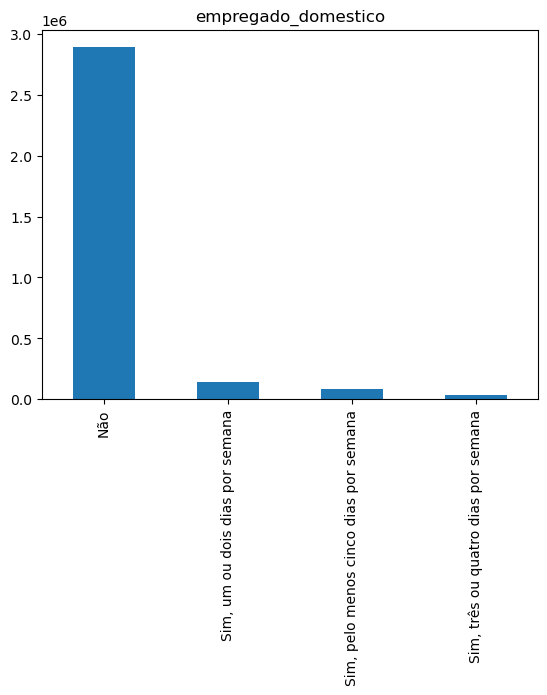

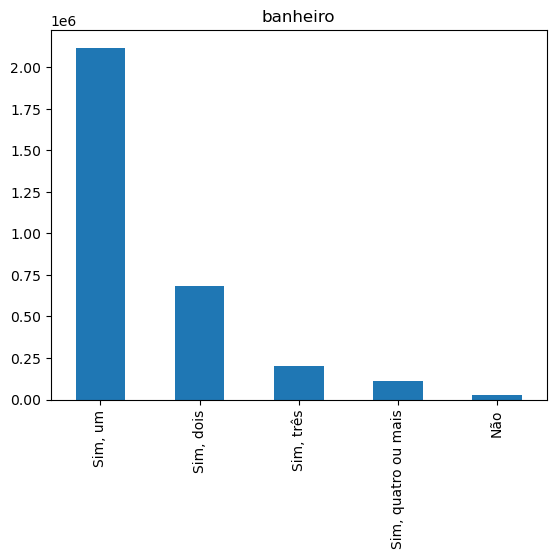

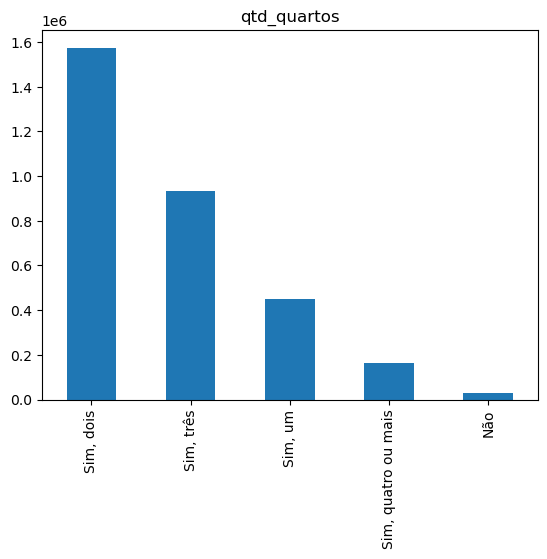

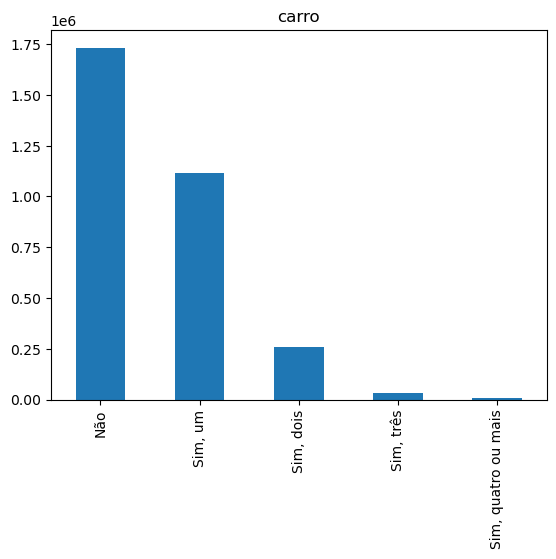

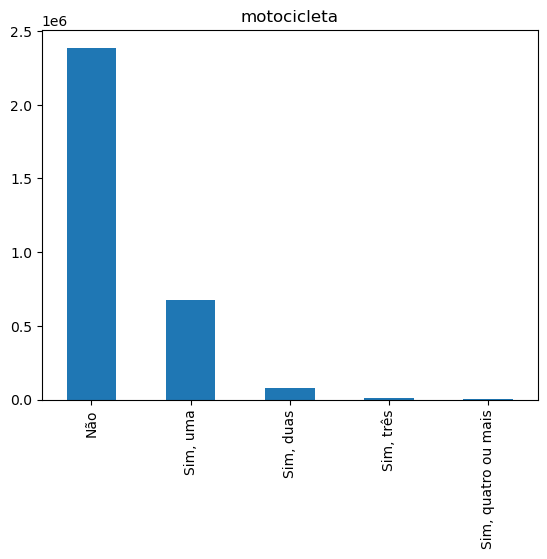

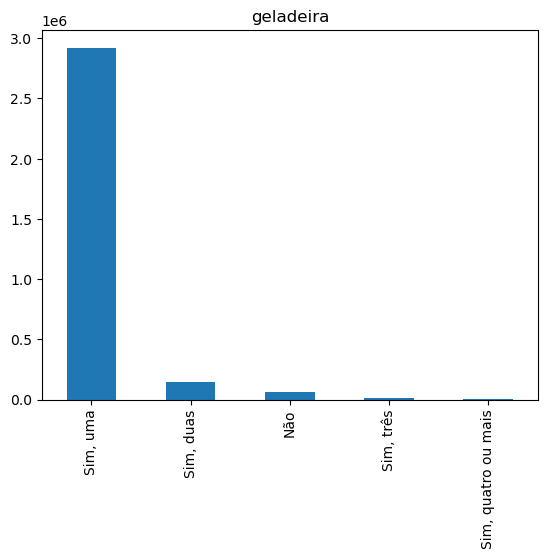

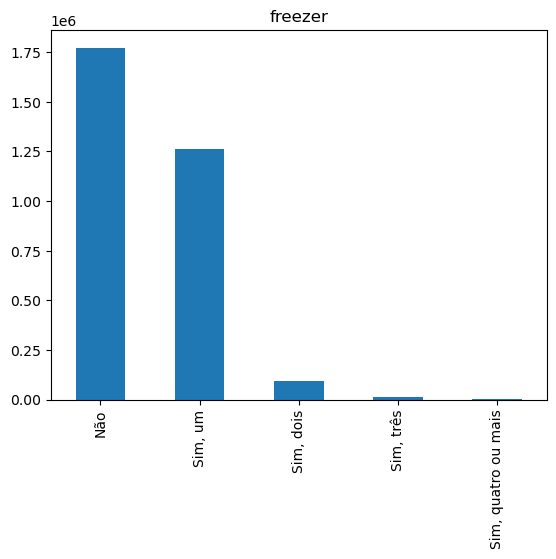

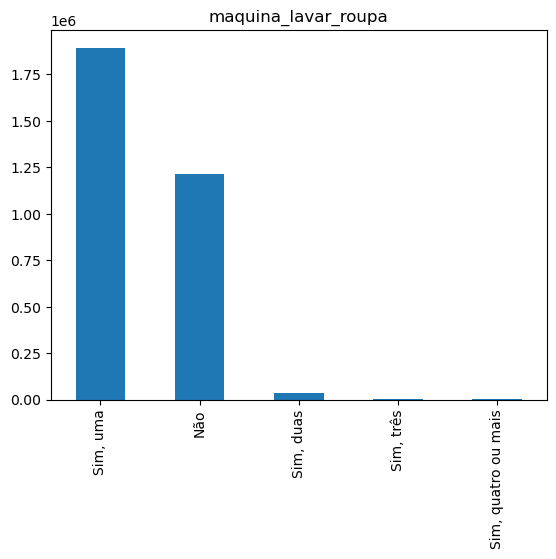

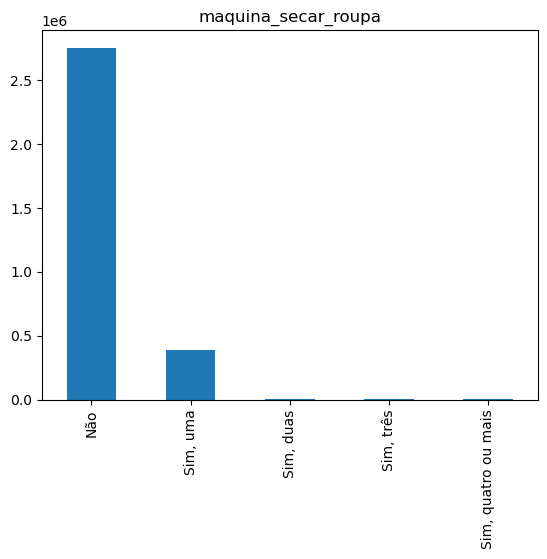

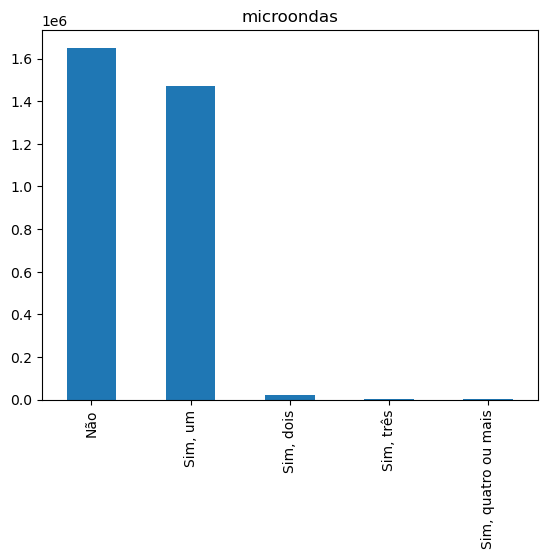

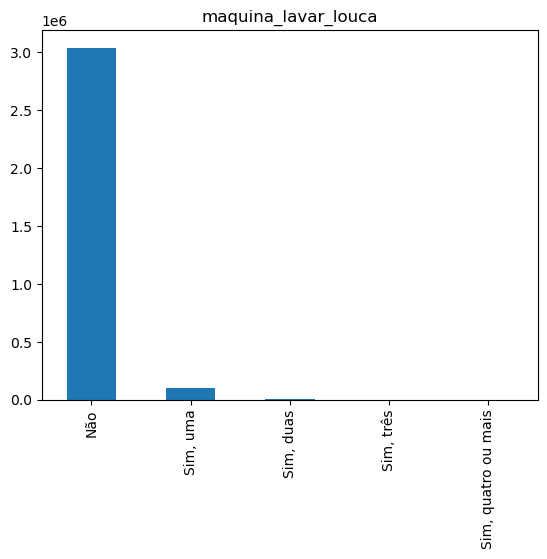

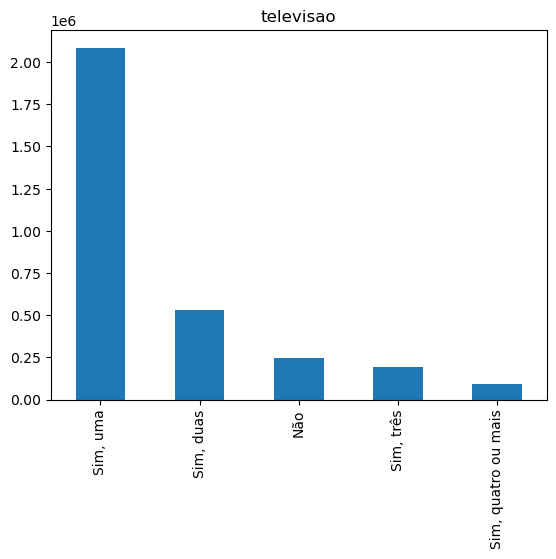

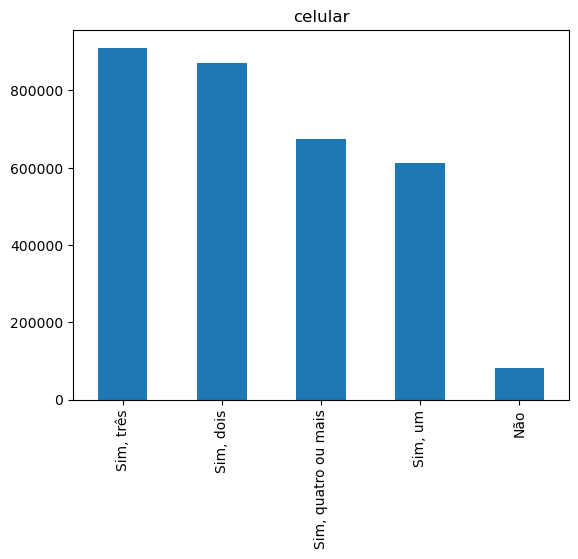

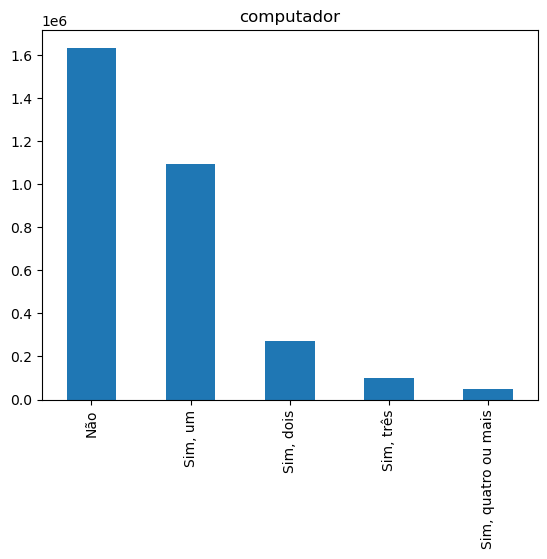

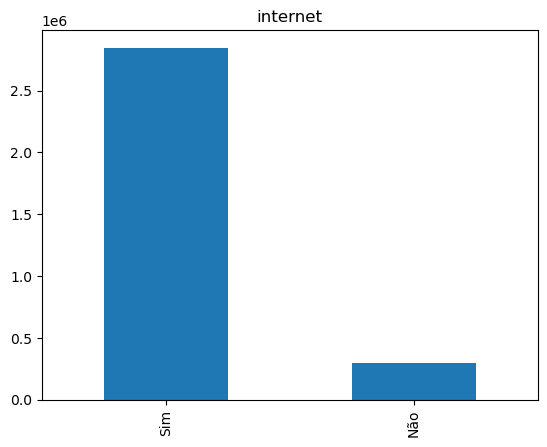

In [7]:
for coluna in colunas_baplot:
    df_train_cat[coluna].value_counts().plot(kind = 'bar')
    plt.title(coluna)
    plt.show()

#### De forma similar, vamos plotar histogramas para analisar a distribuição das notas por disciplina

In [8]:
df_train_cat.columns

Index(['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'NU_NOTA_REDACAO', 'escolaridade_pai', 'escolaridade_mae',
       'ocupacao_pai', 'ocupacao_mae', 'qtd_pessoas_residencia',
       'renda_familiar', 'empregado_domestico', 'banheiro', 'qtd_quartos',
       'carro', 'motocicleta', 'geladeira', 'freezer', 'maquina_lavar_roupa',
       'maquina_secar_roupa', 'microondas', 'maquina_lavar_louca', 'televisao',
       'celular', 'computador', 'internet', 'estrato', 'MEDIA_GERAL'],
      dtype='object')

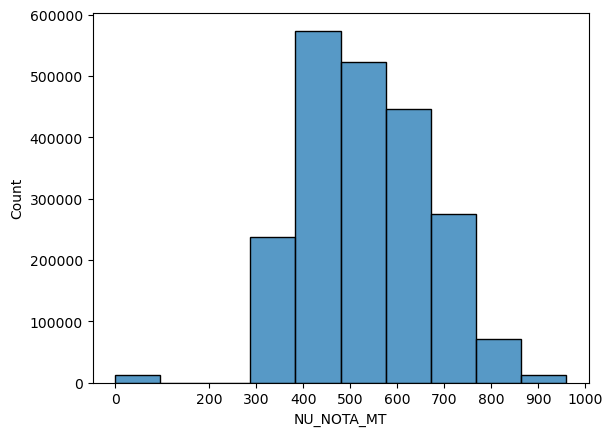

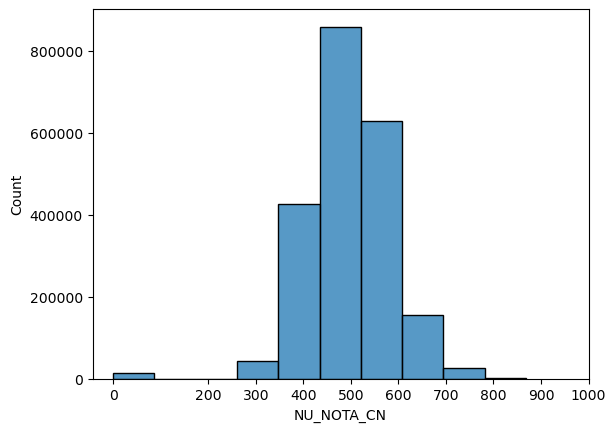

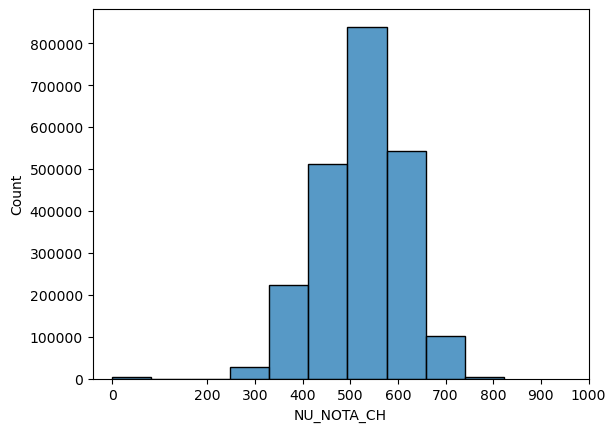

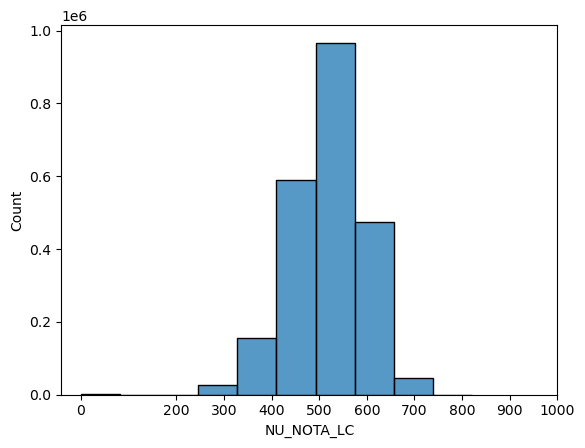

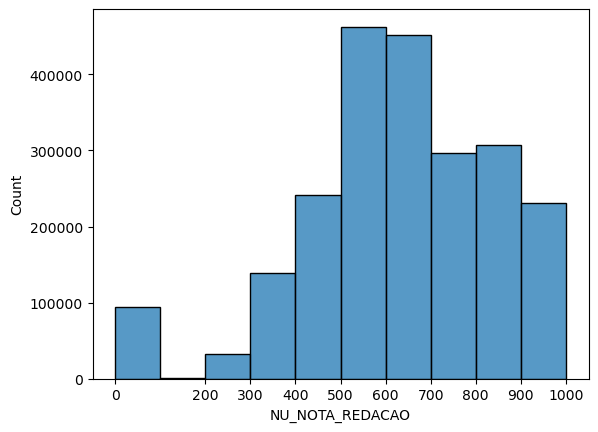

In [9]:
notas_cols = ["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]  # Ajuste conforme necessário

for notas in notas_cols:
    sns.histplot(df_train_cat[notas], bins=10)
    plt.xticks([0,200,300,400,500,600,700,800,900,1000])
    plt.show()

In [10]:
notas_cols

['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [11]:
df_train_cat.melt(value_vars=notas_cols, var_name="Prova", value_name="Nota")

,Prova,Nota
0,NU_NOTA_MT,631.9
1,NU_NOTA_MT,543.5
2,NU_NOTA_MT,436.9
3,NU_NOTA_MT,376.3
4,NU_NOTA_MT,NaN
...,...,...
15735815,NU_NOTA_REDACAO,920.0
15735816,NU_NOTA_REDACAO,440.0
15735817,NU_NOTA_REDACAO,0.0
15735818,NU_NOTA_REDACAO,440.0


#### Distribuição de notas por prova

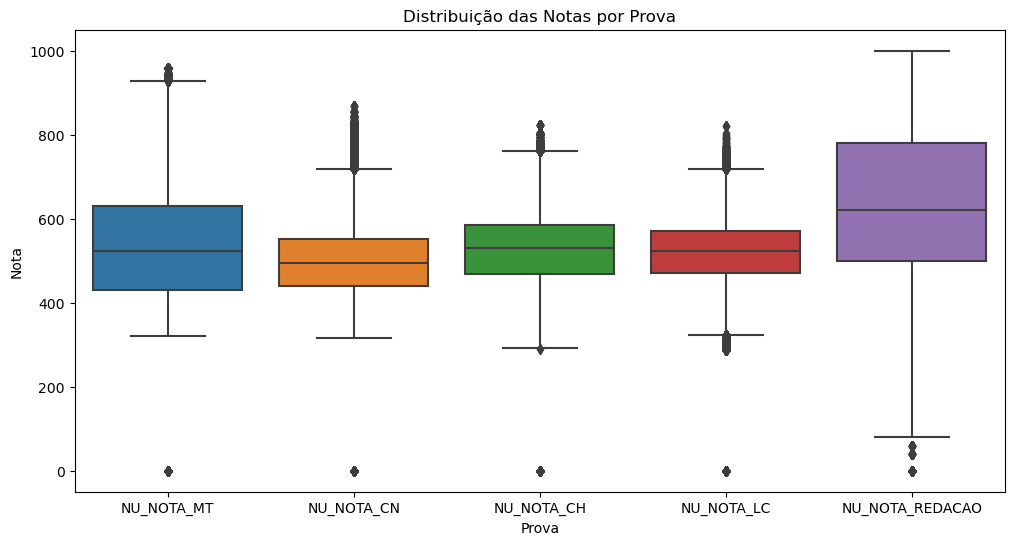

In [12]:
# Criar um DataFrame no formato longo (melted)
df_melted = df_train_cat.melt(value_vars=notas_cols, var_name="Prova", value_name="Nota")

# Criar o boxplot com todas as provas em um único gráfico
plt.figure(figsize=(12, 6))
sns.boxplot(x="Prova", y="Nota", data=df_melted)
#plt.xticks(rotation=45)  
plt.title("Distribuição das Notas por Prova")
plt.show()

Verificando as maiores e menores notas em cada disciplina

In [13]:
for notas in notas_cols:
    print(f"A maior nota de {notas.split('_')[-1]} foi {df_train_cat[notas].max()} e a menor foi {df_train_cat[notas].min()}")

A maior nota de MT foi 958.6 e a menor foi 0.0
A maior nota de CN foi 868.4 e a menor foi 0.0
A maior nota de CH foi 823.0 e a menor foi 0.0
A maior nota de LC foi 820.8 e a menor foi 0.0
A maior nota de REDACAO foi 1000.0 e a menor foi 0.0


#### Distribuição de notas por prova, se é treineiro ou não

IN_TREINEIRO
Não    531.964337
Sim    541.853797
Name: NU_NOTA_MT, dtype: float64


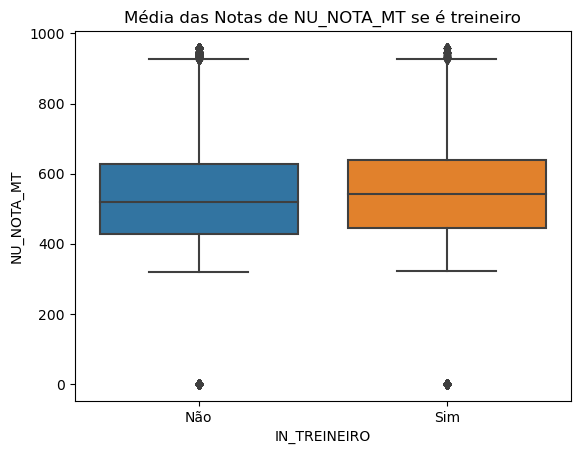

IN_TREINEIRO
Não    496.774539
Sim    491.627366
Name: NU_NOTA_CN, dtype: float64


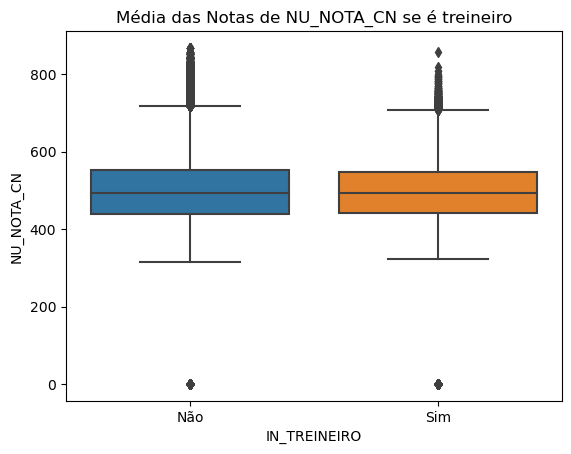

IN_TREINEIRO
Não    523.979381
Sim    520.668458
Name: NU_NOTA_CH, dtype: float64


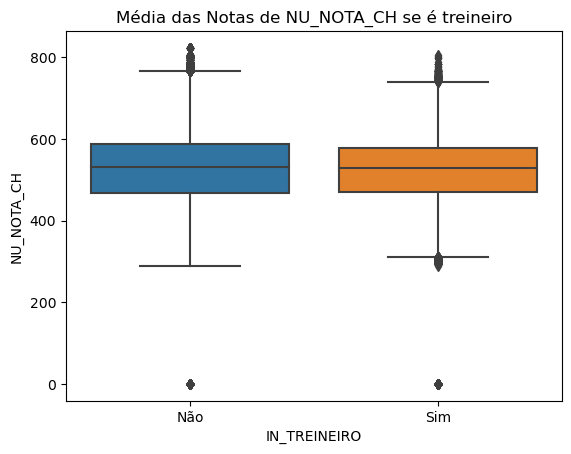

IN_TREINEIRO
Não    518.178503
Sim    517.914951
Name: NU_NOTA_LC, dtype: float64


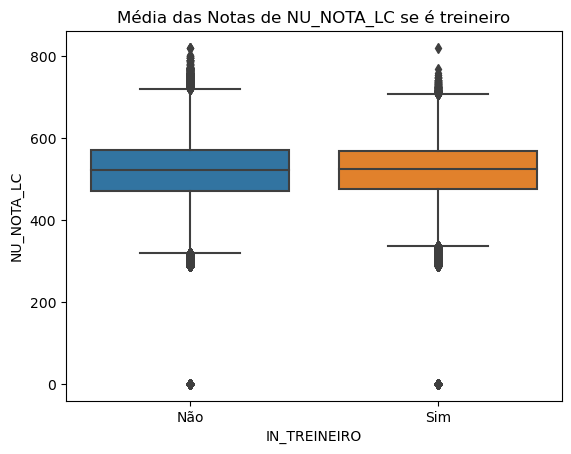

IN_TREINEIRO
Não    616.627502
Sim    622.944031
Name: NU_NOTA_REDACAO, dtype: float32


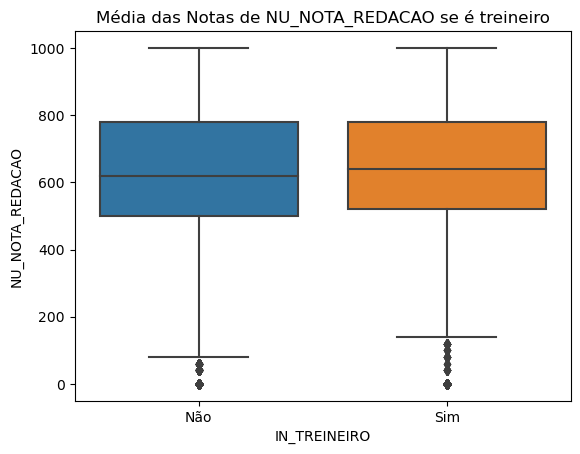

In [14]:
#Nota por tipo de escola (pública/privada)
for notas in notas_cols:
    print(df_train_cat.groupby("IN_TREINEIRO")[f'{notas}'].mean())
    sns.boxplot(df_train_cat, x=df_train_cat["IN_TREINEIRO"], y=df_train_cat[f'{notas}'])
    plt.title(f"Média das Notas de {notas} se é treineiro")
    plt.show()

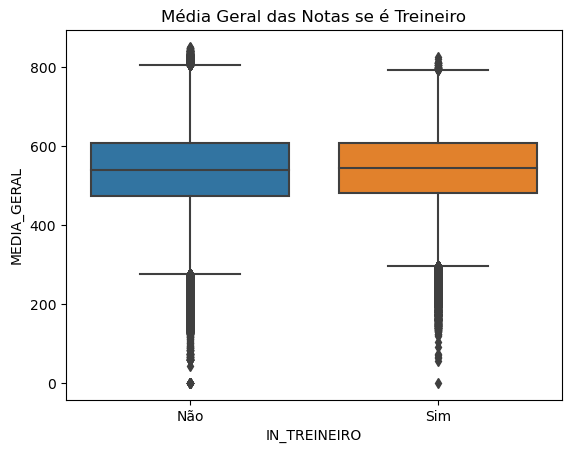

In [15]:
sns.boxplot(df_train_cat, x=df_train_cat["IN_TREINEIRO"], y=df_train_cat['MEDIA_GERAL'])
plt.title("Média Geral das Notas se é Treineiro")
plt.show()

### Uma das análises mais relevantes é em relação a distribuição de notas por tipo de escola. Vemos de forma bem expressiva, que escolas privadas possuem um rendimento bem superior as escolas públicas 

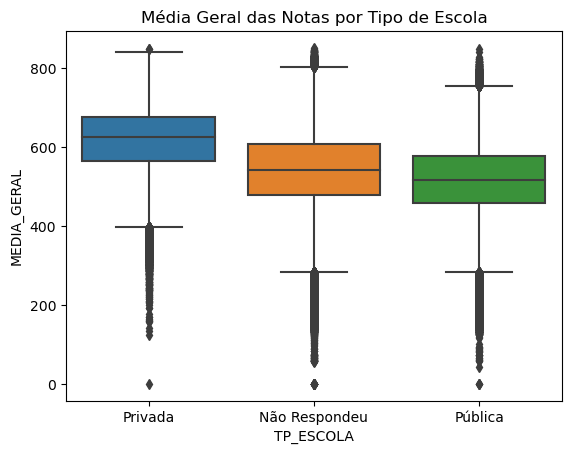

In [16]:
sns.boxplot(df_train_cat, x=df_train_cat["TP_ESCOLA"], y=df_train_cat['MEDIA_GERAL'])
plt.title("Média Geral das Notas por Tipo de Escola")
plt.show()

### Análise da distribuição de renda e comparação das notas por renda

<Axes: >

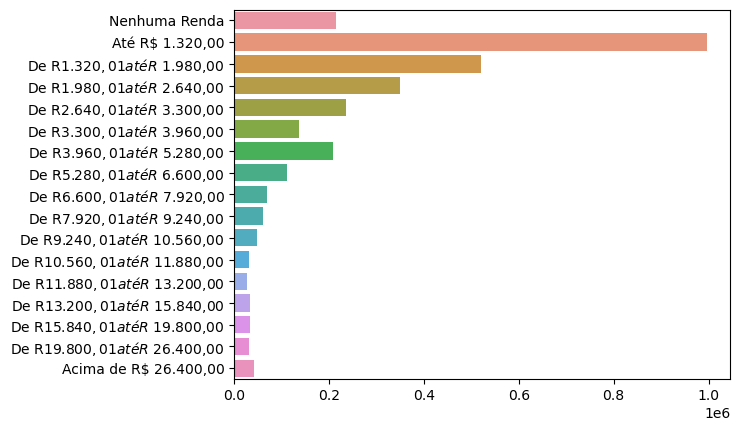

In [17]:
sns.barplot(x=df_train_cat['renda_familiar'].value_counts().values, y=df_train_cat['renda_familiar'].value_counts().index)

In [18]:
df_train_cat['renda_familiar'].value_counts(normalize = True)

Até R$ 1.320,00                     0.316544
De R$ 1.320,01 até R$ 1.980,00      0.165467
De R$ 1.980,01 até R$ 2.640,00      0.111178
De R$ 2.640,01 até R$ 3.300,00      0.074733
Nenhuma Renda                       0.068138
De R$ 3.960,01 até R$ 5.280,00      0.066427
De R$ 3.300,01 até R$ 3.960,00      0.043556
De R$ 5.280,01 até R$ 6.600,00      0.035405
De R$ 6.600,01 até R$ 7.920,00      0.021853
De R$ 7.920,01 até R$ 9.240,00      0.019110
De R$ 9.240,01 até R$ 10.560,00     0.015158
Acima de R$ 26.400,00               0.013088
De R$ 13.200,01 até R$ 15.840,00    0.010567
De R$ 15.840,01 até R$ 19.800,00    0.010478
De R$ 10.560,01 até R$ 11.880,00    0.010064
De R$ 19.800,01 até R$ 26.400,00    0.009686
De R$ 11.880,01 até R$ 13.200,00    0.008548
Name: renda_familiar, dtype: float64

In [21]:
df_train_cat['renda_familiar'].value_counts(normalize = True)[:7].sum()

0.8460432948521271

#### Vemos que a renda familiar dos estudantes está fortemente concentrada até R$ 5300. De forma mais explícita, 84,6 

#### Abaixo, temos uma análise da distribuição de renda dos candidatos e relação entre renda e nota em cada disciplina

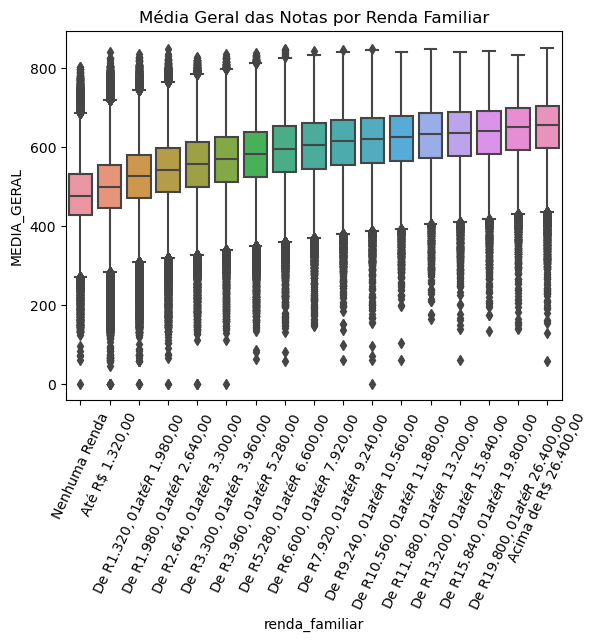

In [16]:
sns.boxplot(df_train_cat, x=df_train_cat["renda_familiar"], y=df_train_cat['MEDIA_GERAL'])
plt.title("Média Geral das Notas por Renda Familiar")
plt.xticks(rotation = 65)
plt.show()

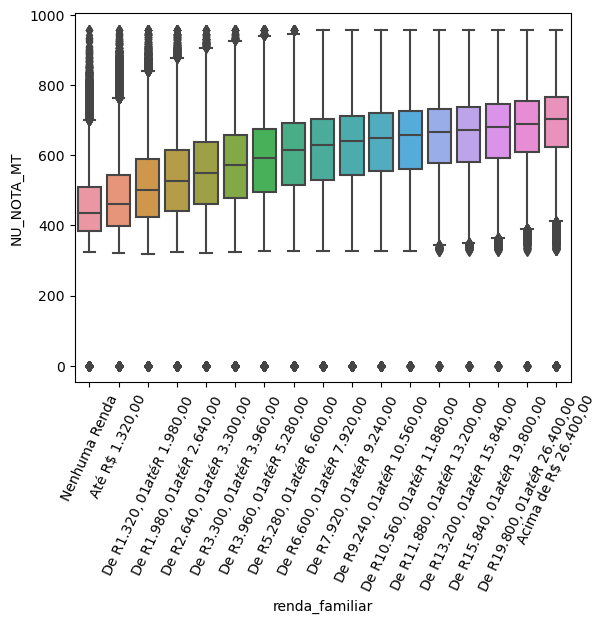

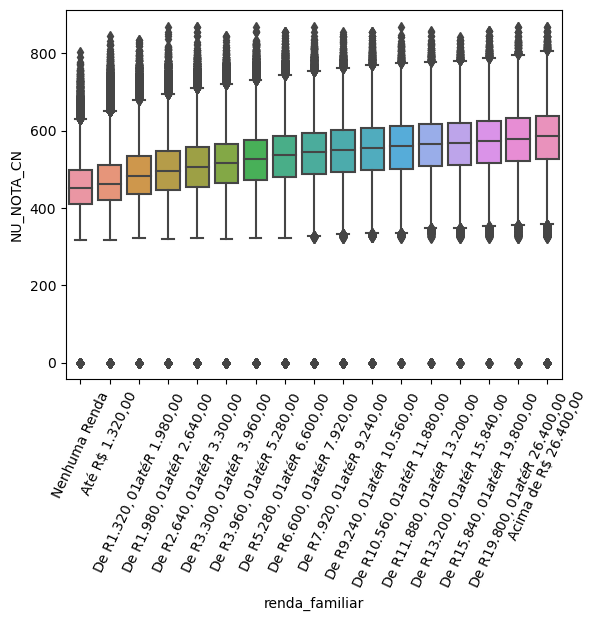

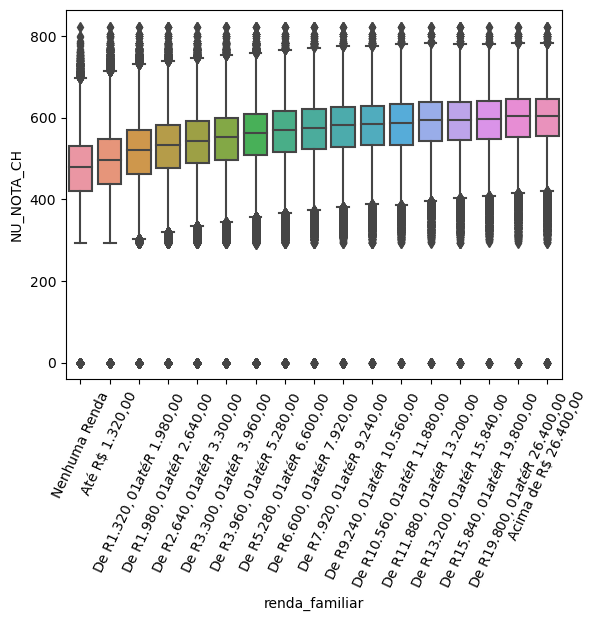

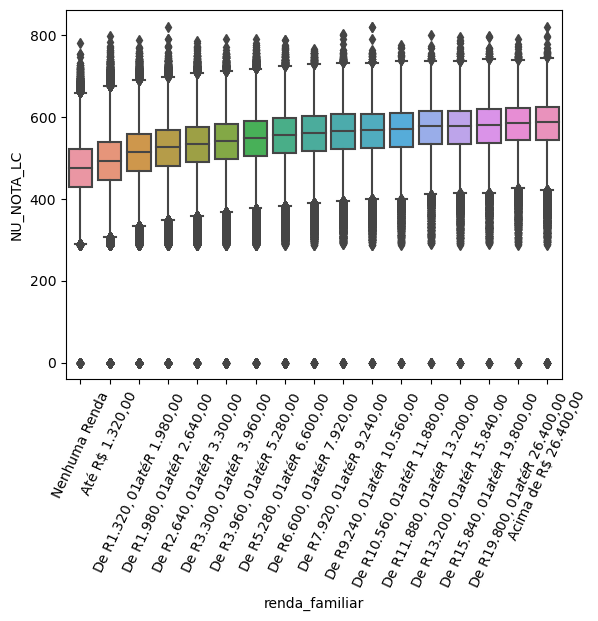

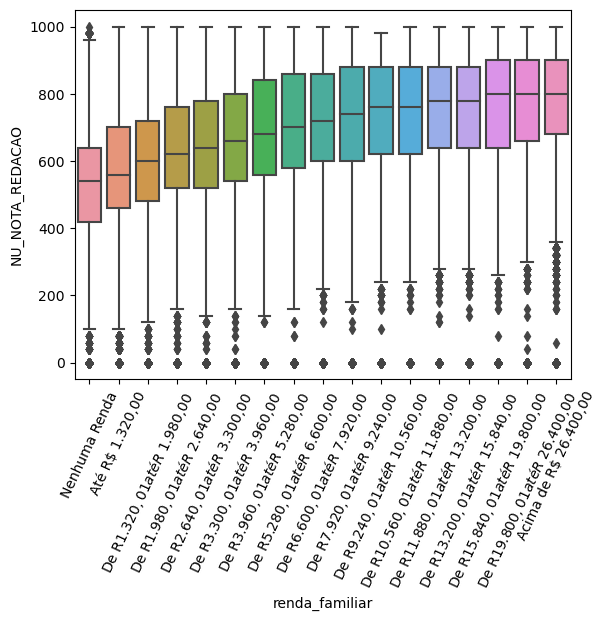

In [23]:
notas_cols = ["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]  # Ajuste conforme necessário
for notas in notas_cols:
    sns.boxplot(x=df_train_cat['renda_familiar'], y=df_train_cat[f'{notas}'])
    plt.xticks(rotation=65)
    plt.show()

#### Também foi feita uma análise de renda como três grandes grupos:
- Baixa Renda
- Média Renda 
- Alta Renda

In [24]:
df_train_num = pd.read_parquet("df_train_num.parquet")

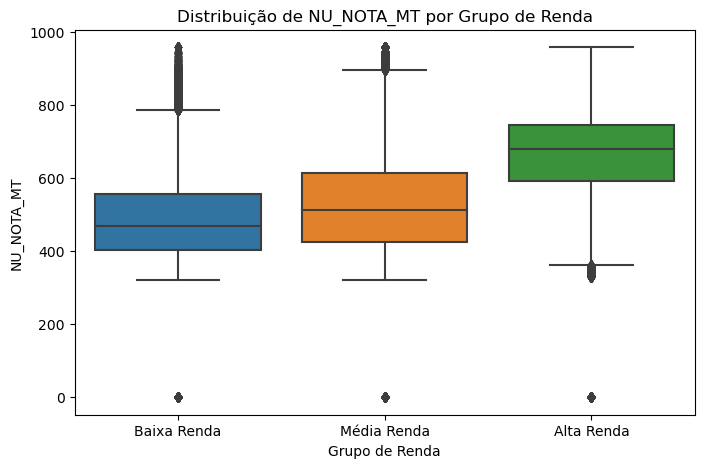

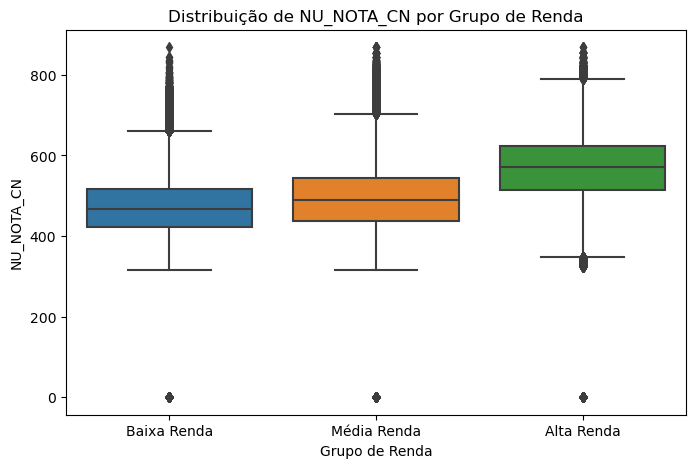

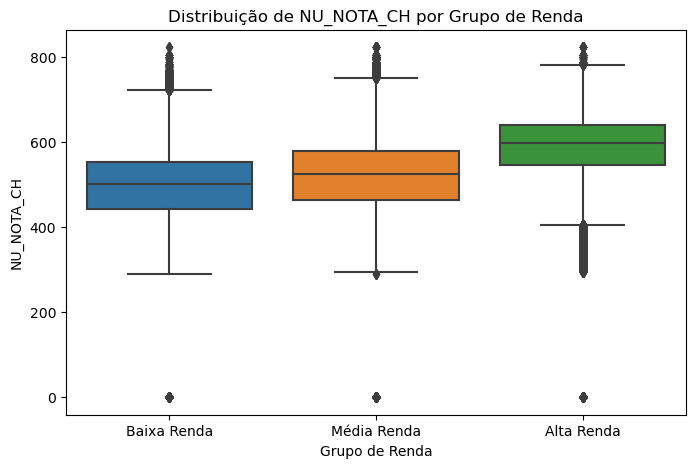

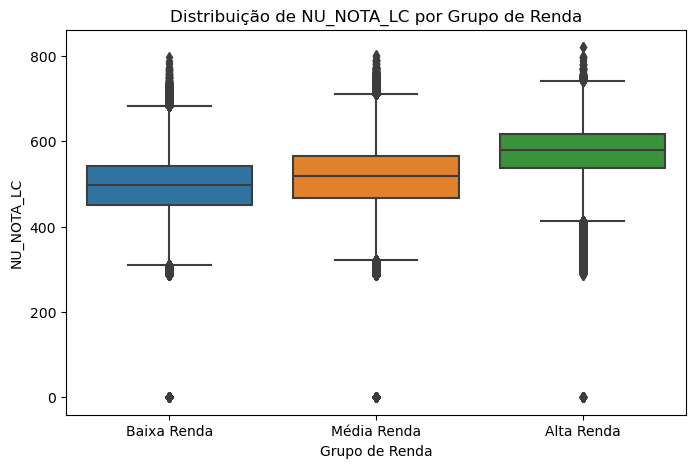

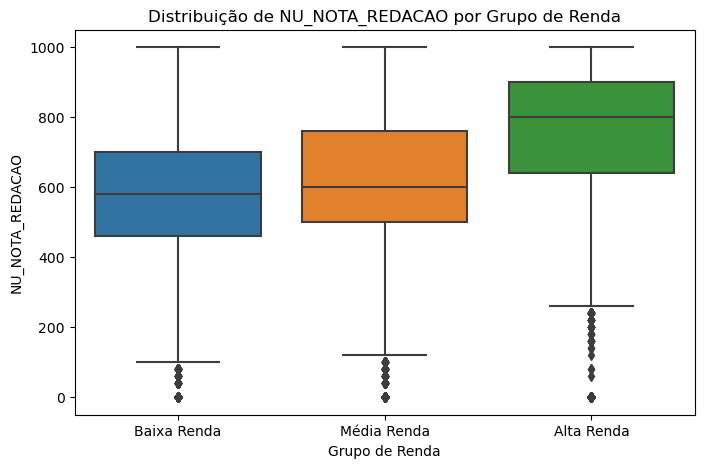

In [25]:
# Definir categorias de renda
renda_categorias = ["Baixa Renda", "Média Renda", "Alta Renda"]

# Criar DataFrame temporário com as notas e grupos de renda
notas_cols = ["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
df_renda = pd.DataFrame()


for renda, grupo in zip(renda_categorias, [
    df_train_num[df_train_num["renda_familiar"] < 3],
    df_train_num[df_train_num["renda_familiar"] < 11],
    df_train_num[df_train_num["renda_familiar"] >= 11]
]):

    grupo_temp = grupo[notas_cols].copy()
    grupo_temp["Renda"] = renda
    df_renda = pd.concat([df_renda, grupo_temp])

# Criar boxplots para cada nota
for nota in notas_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_renda["Renda"], y=df_renda[nota])
    plt.title(f"Distribuição de {nota} por Grupo de Renda")
    plt.xlabel("Grupo de Renda")
    plt.ylabel(nota)
    plt.show()

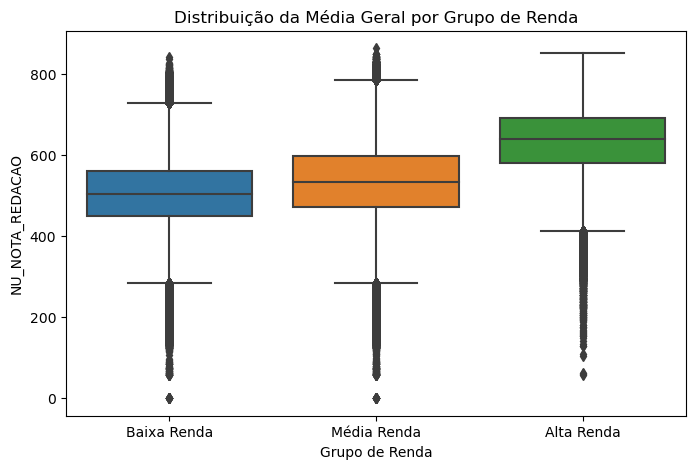

In [26]:
# Definir categorias de renda
renda_categorias = ["Baixa Renda", "Média Renda", "Alta Renda"]

# Criar DataFrame temporário com as notas e grupos de renda
notas_cols = ["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
df_renda = pd.DataFrame()


for renda, grupo in zip(renda_categorias, [
    df_train_num[df_train_num["renda_familiar"] < 3],
    df_train_num[df_train_num["renda_familiar"] < 11],
    df_train_num[df_train_num["renda_familiar"] >= 11]
]):

    grupo_temp = grupo[notas_cols].copy()
    grupo_temp["Renda"] = renda
    df_renda = pd.concat([df_renda, grupo_temp])

df_renda['MEDIA_GERAL'] = (df_renda['NU_NOTA_CN'] + df_renda['NU_NOTA_CH'] + df_renda['NU_NOTA_LC'] + df_renda['NU_NOTA_MT'] + df_renda['NU_NOTA_REDACAO'])/5
# Criar boxplots para cada nota

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_renda["Renda"], y=df_renda["MEDIA_GERAL"])
plt.title(f"Distribuição da Média Geral por Grupo de Renda")
plt.xlabel("Grupo de Renda")
plt.ylabel(nota)
plt.show()

#### Média Geral das Notas por escolaridade da Mãe e do Pai

'0' : Nunca estudou.\
'1' : Não completou a 4ª série/5º ano do Ensino Fundamental.\
'2' : Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.\
'3' : Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.\
'4' : Completou o Ensino Médio, mas não completou a Faculdade.\
'5' : Completou a Faculdade, mas não completou a Pós-graduação.\
'6' : Completou a Pós-graduação.\
'7' : Não sei.

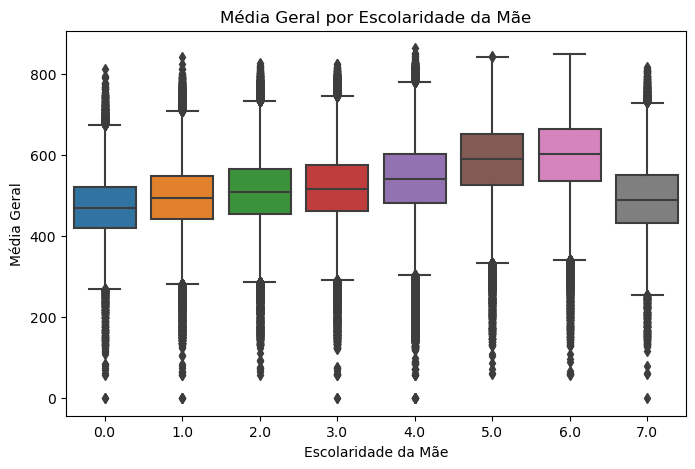

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train_num['escolaridade_mae'], y=df_train_num['MEDIA_GERAL'])
plt.title(f"Média Geral por Escolaridade da Mãe")
plt.xlabel("Escolaridade da Mãe")
plt.ylabel('Média Geral')
plt.show()

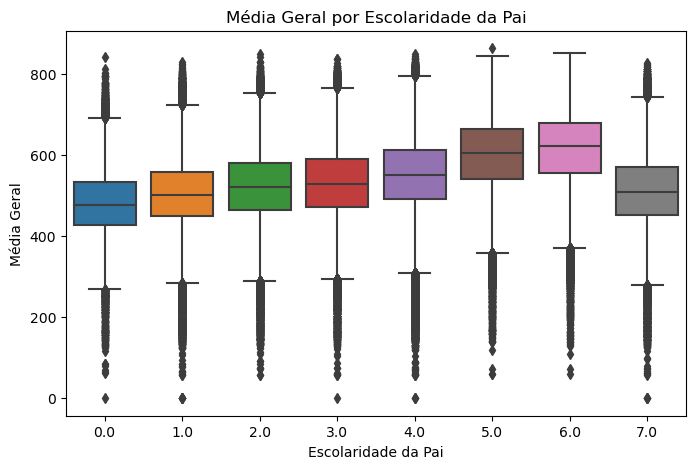

In [24]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train_num['escolaridade_pai'], y=df_train_num['MEDIA_GERAL'])
plt.title(f"Média Geral por Escolaridade da Pai")
plt.xlabel("Escolaridade da Pai")
plt.ylabel('Média Geral')
plt.show()

##### Vemos também que a escolaridade dos pais também tem uma correlação alta com as notas

#### Quantidade de Computadores e Notas

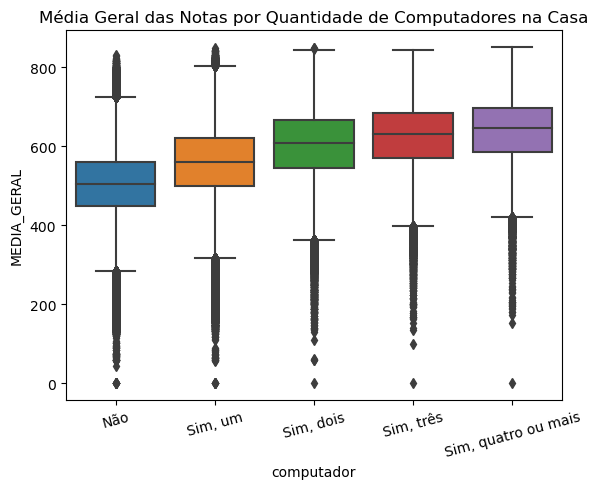

In [25]:
sns.boxplot(df_train_cat, x=df_train_cat["computador"], y=df_train_cat['MEDIA_GERAL'])
plt.title("Média Geral das Notas por Quantidade de Computadores na Casa")
plt.xticks(rotation = 15)
plt.show()

#### Análise das notas por Sexo

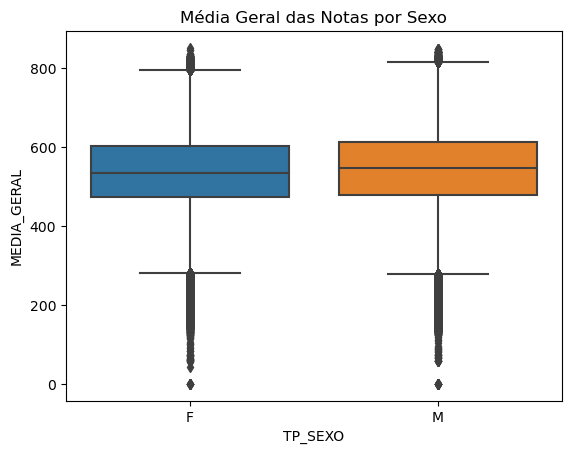

In [18]:
sns.boxplot(df_train_cat, x=df_train_cat["TP_SEXO"], y=df_train_cat['MEDIA_GERAL'])
plt.title("Média Geral das Notas por Sexo")
plt.show()

TP_SEXO
F    516.868740
M    560.816589
Name: NU_NOTA_MT, dtype: float64


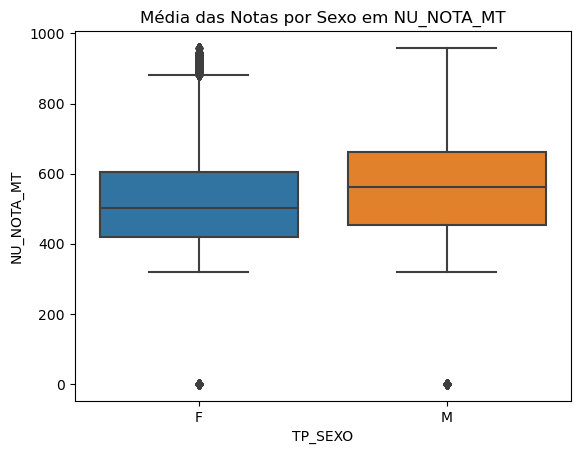

TP_SEXO
F    487.574887
M    508.808363
Name: NU_NOTA_CN, dtype: float64


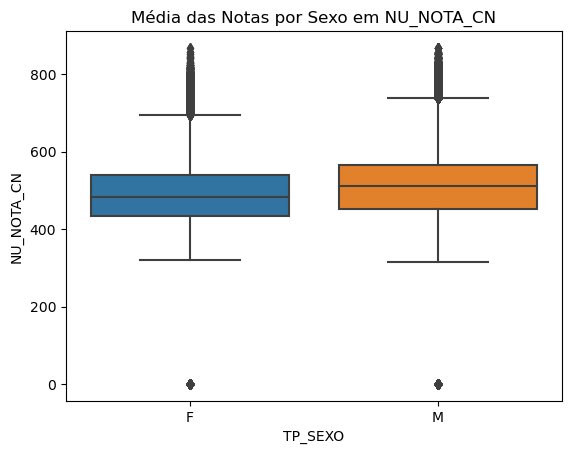

TP_SEXO
F    519.899149
M    528.809730
Name: NU_NOTA_CH, dtype: float64


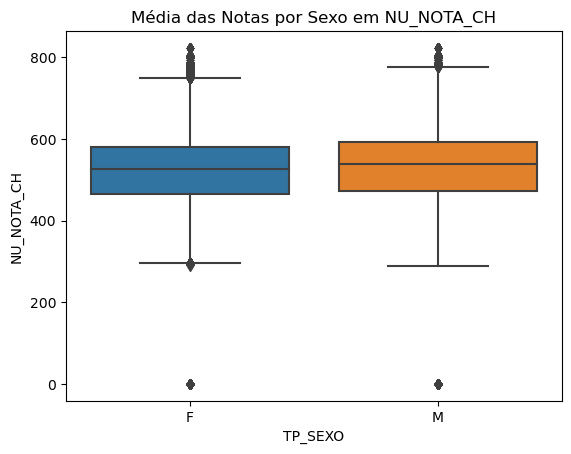

TP_SEXO
F    517.113253
M    519.742304
Name: NU_NOTA_LC, dtype: float64


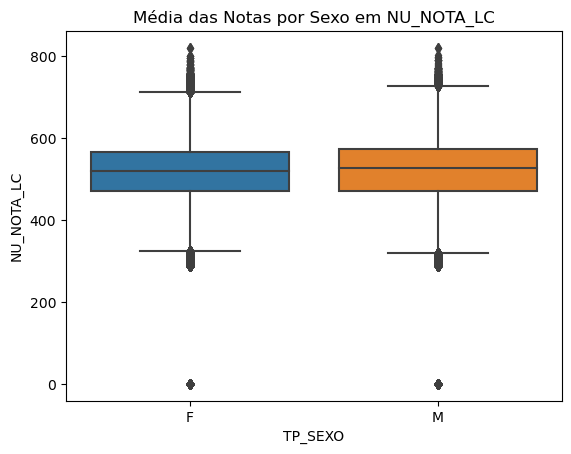

TP_SEXO
F    635.012939
M    590.527954
Name: NU_NOTA_REDACAO, dtype: float32


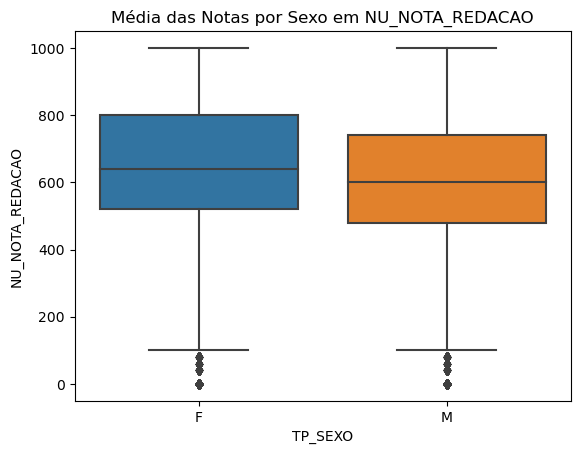

In [ ]:
for notas in notas_cols:
    print(df_train_cat.groupby("TP_SEXO")[f'{notas}'].mean())
    sns.boxplot(df_train_cat, x=df_train_cat["TP_SEXO"], y=df_train_cat[f'{notas}'])
    plt.title(f"Média das Notas por Sexo em {notas}")
    plt.show()

#### Análise das Correlações

C:\Users\tonha\AppData\Local\Temp\ipykernel_13440\1907614908.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones(df_train_num.corr().shape), k=1)
C:\Users\tonha\AppData\Local\Temp\ipykernel_13440\1907614908.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train_num.corr(), mask=mask, annot=True, cmap="coolwarm", fmt=".2f")


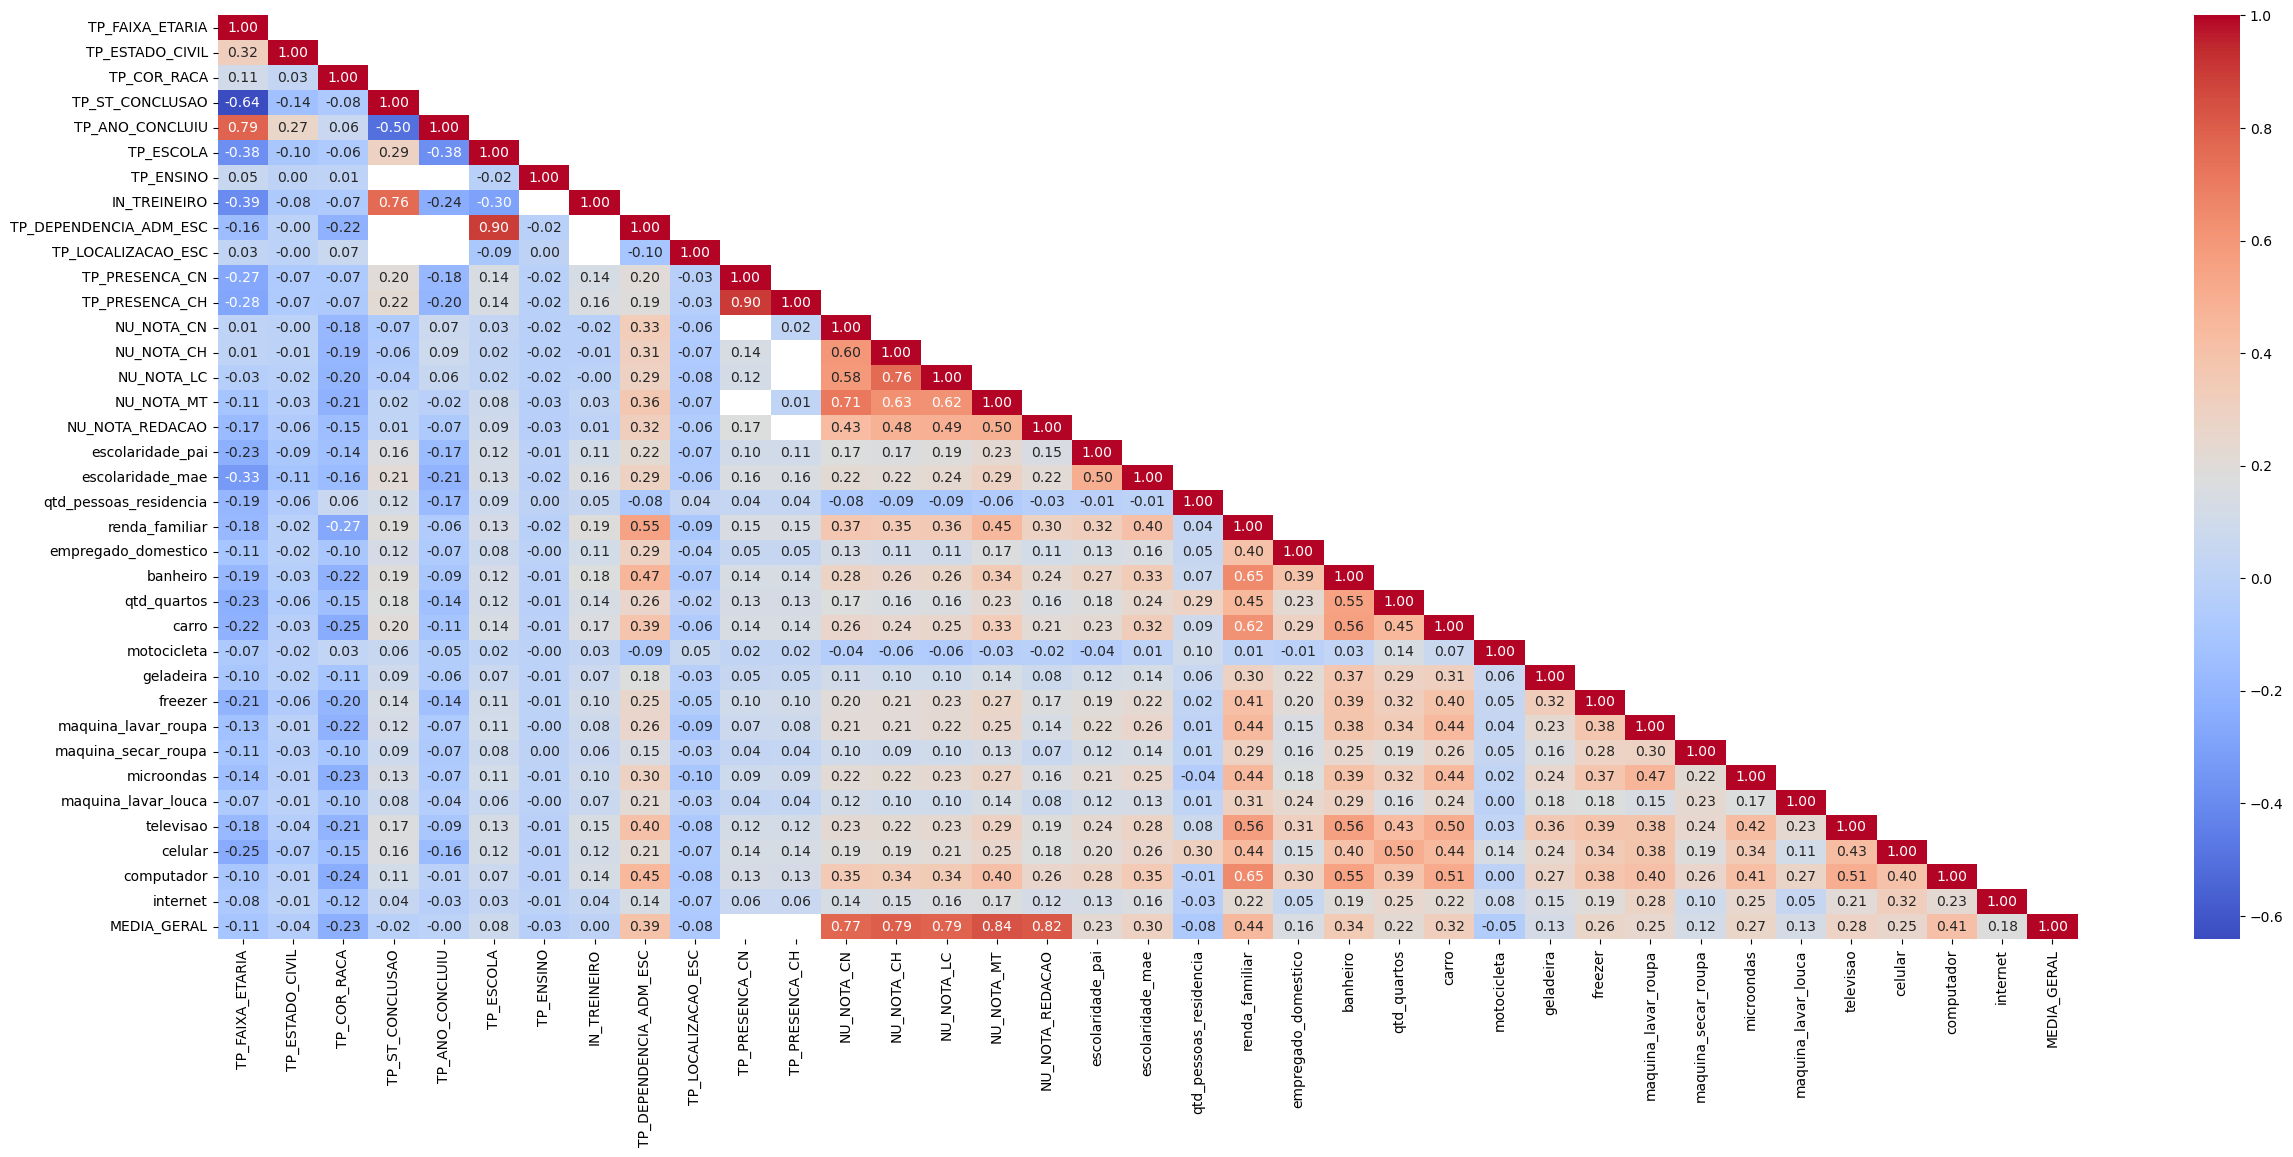

In [27]:
# Criando a máscara para ocultar a parte superior da matriz
mask = np.triu(np.ones(df_train_num.corr().shape), k=1)
plt.figure(figsize=(30, 12))
sns.heatmap(df_train_num.corr(), mask=mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

### Conclusões e Próximos Passos

#### Os aspectos mais importantes nessa análise exploratória foram principalmente em relação ao desempenho dos estudantes com suas situações socioeconômicas, que foram discutidas ao longo do notebook

#### Foi visto que em diversos aspectos a renda aparenta estar muito correlacionada com as notas, assim como escolaridade dos pais.

- Como próximos passos, há alguns testes de hipótese que podemos aplicar, como por exemplo: 

- O candidato ser treineiro ou não influencia na média geral?
- A próxima faixa de renda tem realmente mais chance de ter notas maiores em relação a renda anterior? Pode ser que algumas não tenham, mas outras sim. Exemplo: Entre R$ 1980,00 e  3300,00 a diferença parece ser pouca, então o teste de hipótese seria bem importante. O caso oposto, é que a renda entre  5280,00 e R$ 7920,00 parece que faz uma diferença maior, mas pra confirmar, novamente precisamos do teste de hipotese
- Teste da média da nota por escolaridade dos pais
